## Programming Session Week 3 

### <font color='green'>Full Solutions</font> 

In this session we will continue to work on regression and we will extend our toolbox to include an additional set of classification methods. 

### Exercise 1

#### Exercise 1.a

The model below was generated using a degree 2 polynomial. Study the evolution of the MSE for various degrees from 1 to 5 and by generating your training and test sets as noisy samples from the true quadratic function. Use $K$-fold cross validation to retrieve the correct model complexity out the possible maximum degrees.

In [9]:

import numpy as np
import matplotlib as plt

num_bins = 5
points_per_bin = 10

dataset_size = num_bins*points_per_bin

bin_list_x = np.zeros((num_bins, 10))
bin_list_t = np.zeros((num_bins, 10))

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

for b in np.arange(num_bins): 

    x_true = np.linspace(0,1,10)
    t_true = 0.1 + 0.1*x_true + x_true**2
    x_sample = np.linspace(0,1,10)
    t_sample = t_true + np.random.normal(0,.1,len(x_sample))

    bin_list_x[b,:] = x_sample
    bin_list_t[b,:] = t_sample
    
    
training_data_x = np.zeros((num_bins, 10*(num_bins-1)))
training_data_t = np.zeros((num_bins, 10*(num_bins-1)))

for b in np.arange(num_bins):
    
    training_data_x_b = []
    training_data_t_b = []
    
    for b2 in np.arange(num_bins):
        
        if b2 != b:
            
            training_data_x_b = np.hstack((training_data_x_b, bin_list_x[b2, :]))
            training_data_t_b = np.hstack((training_data_t_b, bin_list_t[b2, :]))
    
    
    training_data_x[b, :] = training_data_x_b
    training_data_t[b, :] = training_data_t_b


In [11]:
import matplotlib as plt
   
maxDegree = 5

MSE = np.zeros((maxDegree,))
    
for degrees in np.arange(maxDegree)+1:
    
    poly = PolynomialFeatures(degrees)
     
    for b in np.arange(num_bins):
        
        
        feature_mat = poly.fit_transform(training_data_x[b,:].reshape(-1,1))
        reg = LinearRegression().fit(feature_mat, training_data_t[b,:])
        
        Xprediction = poly.fit_transform(bin_list_x[b,:].reshape(-1,1))
        
        MSE[degrees-1] += (1/dataset_size)*np.sum((reg.predict(Xprediction) - bin_list_t[b,:])**2)

plt.plot(MSE)
plt.show()

AttributeError: module 'matplotlib' has no attribute 'plot'

### Exercise 2

#### Exercise 2.a

Using the OLS loss, try to learn a classifier for the dataset given below. 

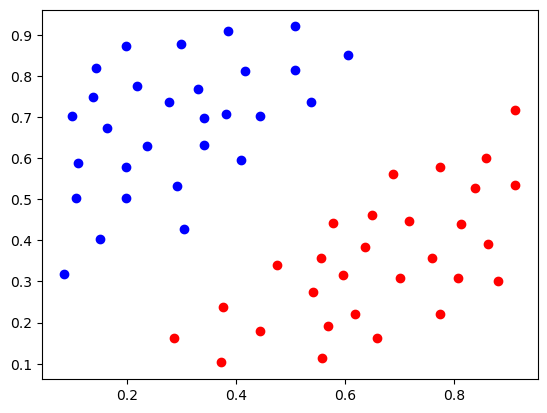

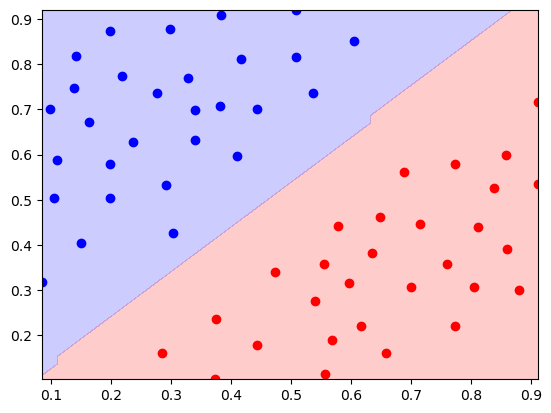

In [12]:

import scipy.io
import matplotlib.pyplot as plt

from matplotlib.colors import ListedColormap
cm_bright = ListedColormap(['#FF0000', '#0000FF'])


data_class1 = scipy.io.loadmat('points_class1_Lab2_Ex1.mat')['points_class1_Lab2_Ex1']
data_class2 = scipy.io.loadmat('points_class2_Lab2_Ex1.mat')['points_class2_Lab2_Ex1']

plt.scatter(data_class1[:,0], data_class1[:,1], c='b')
plt.scatter(data_class2[:,0], data_class2[:,1], c='r')
plt.show()

target_class1 = np.ones((np.shape(data_class1)[0], ))
target_class2 = -np.ones((np.shape(data_class2)[0], ))

from sklearn.linear_model import LinearRegression

my_classification = LinearRegression()

target = np.vstack((target_class1.reshape(-1,1), target_class2.reshape(-1,1)))

data = np.vstack((data_class1, data_class2))

my_classification.fit(data, target)


# Generate a grid of points on which I want to compute the prediction

x1min = np.min(data[:,0])
x1max = np.max(data[:,0])
x2min = np.min(data[:,1])
x2max = np.max(data[:,1])

# generate set of equispaced points

x1 = np.linspace(x1min, x1max, 50)
x2 = np.linspace(x2min, x2max, 50)

# generate all 50*50 coordinates pairs (x1, x2) over the space
# xx1, xx2 are matrices containing the x1 (resp. x2) coordinates of 
# all the points on the 50 x 50 grid 

xx1, xx2 = np.meshgrid(x1, x2)


Xprediction = np.hstack((xx1.reshape(-1,1), xx2.reshape(-1,1)))


prediction_on_grid = my_classification.predict(Xprediction)
# returns a real number

final_prediction_grid = 2*(prediction_on_grid>0)-1


plt.scatter(data_class1[:,0], data_class1[:,1], c='b')
plt.scatter(data_class2[:,0], data_class2[:,1], c='r')
plt.contourf(xx1, xx2, final_prediction_grid.reshape(np.shape(xx1)), levels=0, cmap = cm_bright, alpha=0.2)
plt.show()


In [13]:
print(final_prediction_grid)

[[-1]
 [-1]
 [-1]
 ...
 [-1]
 [-1]
 [-1]]


#### Exercise 2.b

How could you extend your classifier to the dataset shown below.

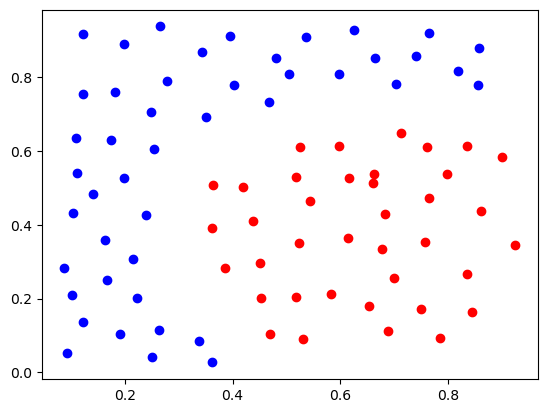

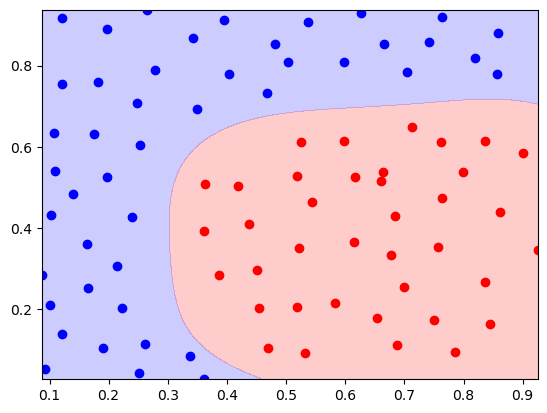

In [40]:

import scipy.io
import matplotlib.pyplot as plt

from matplotlib.colors import ListedColormap
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

data_class1 = scipy.io.loadmat('points_class1_Lab2_Ex2.mat')['points_class1_Lab2_Ex2']
data_class2 = scipy.io.loadmat('points_class2_Lab2_Ex2.mat')['points_class2_Lab2_Ex2']

plt.scatter(data_class1[:,0], data_class1[:,1], c='b')
plt.scatter(data_class2[:,0], data_class2[:,1], c='r')
plt.show()

target_class1 = np.ones((np.shape(data_class1)[0], 1))
target_class2 = -np.ones((np.shape(data_class2)[0], 1))

target = np.vstack((target_class1, target_class2))

data = np.vstack((data_class1, data_class2))

from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(5 )
data_polynomial = poly.fit_transform(data)

my_classification = LinearRegression()

my_classification.fit(data_polynomial, target)


x1min = np.min(data[:,0])
x1max = np.max(data[:,0])
x2min = np.min(data[:,1])
x2max = np.max(data[:,1])

x1 = np.linspace(x1min, x1max, 50)
x2 = np.linspace(x2min, x2max, 50)

# generate the grid 

xx1, xx2 = np.meshgrid(x1, x2)

Xprediction = np.hstack((xx1.reshape(-1,1), xx2.reshape(-1,1)))

Xprediction_polynomial = poly.fit_transform(Xprediction)

predictions_grid = my_classification.predict(Xprediction_polynomial)

plt.scatter(data_class1[:,0], data_class1[:,1], c='b')
plt.scatter(data_class2[:,0], data_class2[:,1], c='r')
plt.contourf(xx1, xx2, predictions_grid.reshape(np.shape(xx1)), levels=0, cmap = cm_bright, alpha=0.2)
plt.show()



#### Exercise 2.c

We now want to use the OLS to learn a multi-class classifier for the dataset below. Start by coding the one-vs-one and one-vs-rest classifiers. Then use the a single 
 discriminant function with one hot encoding of the classes.
    

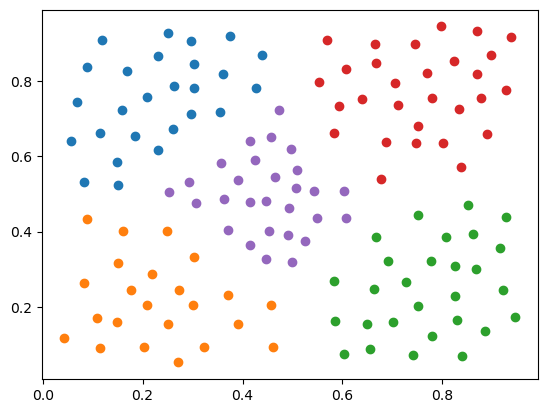

[[0.11923963 0.90875912]
 [0.08928571 0.83576642]
 [0.06854839 0.74233577]
 [0.15841014 0.72189781]
 [0.11463134 0.66058394]
 [0.25979263 0.67226277]
 [0.30357143 0.84452555]
 [0.26209677 0.78613139]
 [0.16762673 0.8270073 ]
 [0.25057604 0.92627737]
 [0.375      0.91751825]
 [0.36117512 0.81824818]
 [0.35426267 0.71605839]
 [0.14919355 0.58467153]
 [0.08237327 0.53211679]
 [0.05702765 0.64014599]
 [0.18375576 0.65474453]
 [0.20910138 0.75693431]
 [0.29665899 0.71313869]
 [0.22983871 0.61678832]
 [0.22983871 0.8649635 ]
 [0.43951613 0.86788321]
 [0.1514977  0.52335766]
 [0.42799539 0.78029197]
 [0.29665899 0.90583942]
 [0.30357143 0.78029197]]


/var/folders/gx/0kb0770j277289p5s43wc72r0000gn/T/ipykernel_90542/655193054.py:97: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  final_prediction[i] = np.argwhere(Prediction[i,:]==1)


In [30]:
import scipy.io
import matplotlib.pyplot as plt
import numpy as np

data_class1 = scipy.io.loadmat('points_class1_Lab2_Ex3.mat')['points_class1_Lab2_Ex3']
data_class2 = scipy.io.loadmat('points_class2_Lab2_Ex3.mat')['points_class2_Lab2_Ex3']
data_class3 = scipy.io.loadmat('points_class3_Lab2_Ex3.mat')['points_class3_Lab2_Ex3']
data_class4 = scipy.io.loadmat('points_class4_Lab2_Ex3.mat')['points_class4_Lab2_Ex3']
data_class5 = scipy.io.loadmat('points_class5_Lab2_Ex3.mat')['points_class5_Lab2_Ex3']



plt.scatter(data_class1[:,0], data_class1[:,1])
plt.scatter(data_class2[:,0], data_class2[:,1])
plt.scatter(data_class3[:,0], data_class3[:,1])
plt.scatter(data_class4[:,0], data_class4[:,1])
plt.scatter(data_class5[:,0], data_class5[:,1])

plt.show()


data = np.vstack((data_class1, data_class2))
data = np.vstack((data, data_class3))
data = np.vstack((data, data_class4))
data = np.vstack((data, data_class5))
#print(data_class1)
num_points = np.shape(data)[0]

# generating polynomial features

from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(4)
data_poly = poly.fit_transform(data)




target = np.zeros((num_points, 1))

num0 = np.shape(data_class1)[0]
num1 = np.shape(data_class2)[0]
num2 = np.shape(data_class3)[0]
num3 = np.shape(data_class4)[0]
num4 = np.shape(data_class5)[0]


target[num0:num0+num1+1] = 1
target[num0+num1:num0+num1+num2+1] = 2
target[num0+num1+num2:num0+num1+num2+num3+1] = 3
target[num0+num1+num2+num3:] = 4

K = 5


from sklearn.linear_model import LinearRegression


x1min = np.min(data[:,0])
x1max = np.max(data[:,0])
x2min = np.min(data[:,1])
x2max = np.max(data[:,1])

# generate boundaries of the grid

x1 = np.linspace(x1min, x1max, 500)
x2 = np.linspace(x2min, x2max, 500)

xx1, xx2 = np.meshgrid(x1, x2)

data_prediction = np.vstack((xx1.flatten(), xx2.flatten())).T

data_prediction_poly = poly.fit_transform(data_prediction)


Prediction = np.zeros((len(xx1.flatten()), K-1))

for k in np.arange(K-1):
    
        indices_class_k = np.where(target == k)
        target_one_vs_rest = np.zeros((len(target), 1))
        target_one_vs_rest[indices_class_k] = 1
        
        reg = LinearRegression()
        reg.fit(data_poly, target_one_vs_rest)
        
        Prediction[:,k] = np.squeeze(reg.predict(data_prediction_poly)>1/2)

        
final_prediction = np.zeros((len(xx1.flatten()), ))

for i in np.arange(len(final_prediction)):
    
    
    if np.argwhere(Prediction[i,:]==1).size ==1:
        
        final_prediction[i] = np.argwhere(Prediction[i,:]==1)
        
    elif np.argwhere(Prediction[i,:]==1).size >1:
        
        final_prediction[i] = 5
        
    else:
    
        final_prediction[i] = 4
    
    


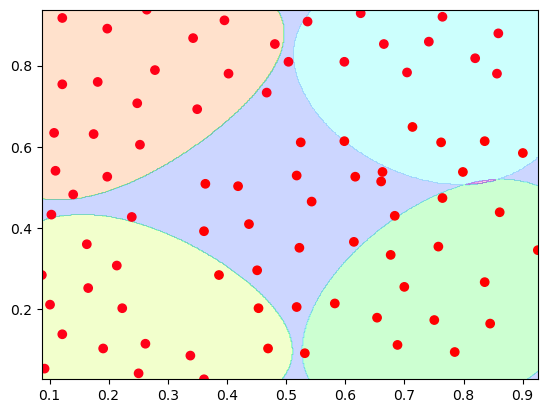

In [53]:

from matplotlib.colors import ListedColormap


plt.contourf(xx1, xx2, final_prediction.reshape(np.shape(xx1)), cmap=plt.cm.hsv, alpha=.2)
plt.scatter(data[:,0], data[:,1], c = target,cmap=plt.cm.hsv)

plt.show()

    


In [54]:
from sklearn.preprocessing import PolynomialFeatures

mypoly = PolynomialFeatures(6)

Polynomial_features = mypoly.fit_transform(data)

targetMatrix = np.zeros((len(target), K))


for i in np.arange(len(target)):
    
    targetMatrix[i,int(target[i])] = 1
       
        
# for regularization we consider the inverse inv(X^TX + Id)

XTX = np.matmul(Polynomial_features.T, Polynomial_features)
identity = np.identity(np.shape(XTX)[0])
lbda = .1
mat_tmp = XTX + lbda*identity
        
invXTX = np.linalg.inv(mat_tmp) 
RHS = np.matmul(Polynomial_features.T, targetMatrix)

Beta = np.matmul(invXTX,RHS)


x1min = np.min(data[:,0])
x1max = np.max(data[:,0])
x2min = np.min(data[:,1])
x2max = np.max(data[:,1])

# generate boundaries of the grid

x1 = np.linspace(x1min, x1max, 500)
x2 = np.linspace(x2min, x2max, 500)

xx1, xx2 = np.meshgrid(x1, x2)

data_prediction = np.vstack((xx1.flatten(), xx2.flatten())).T


Polynomial_features_prediction = mypoly.fit_transform(data_prediction)

prediction_grid = np.matmul(Polynomial_features_prediction, Beta)

prediction = np.argmax(prediction_grid, axis=1)



/var/folders/gx/0kb0770j277289p5s43wc72r0000gn/T/ipykernel_90542/1617969017.py:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  targetMatrix[i,int(target[i])] = 1


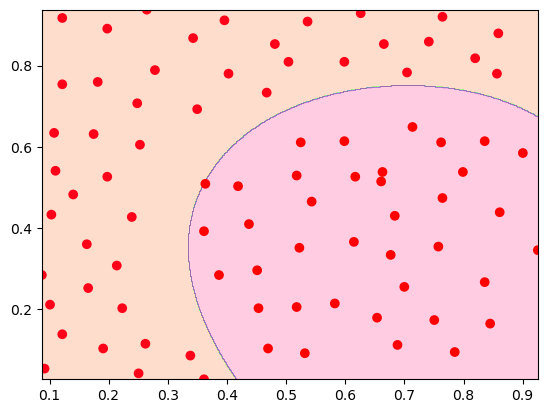

In [55]:

from matplotlib.colors import ListedColormap
plt.contourf(xx1, xx2, prediction.reshape(np.shape(xx1)), cmap=plt.cm.hsv, alpha=.2)
plt.scatter(data[:,0], data[:,1], c = target,cmap=plt.cm.hsv)

plt.show()


### Exercise 3. 

#### Exercise 3.a 

Use the OLS classifier from scikit-learn to classify the flowers from the [iris dataset](https://www.kaggle.com/uciml/iris) into the 3 species. Don't forget to split your dataset into a training and a test part so that you evaluate it properly once it has been trained (you can rely on scikit learn's train_test_split function)
    

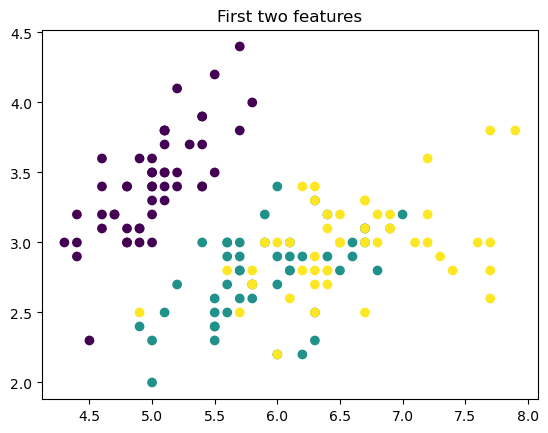

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


from sklearn import datasets
iris = datasets.load_iris()
X = iris.data 
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# plotting the first two features 
plt.scatter(X[:,0], X[:,1],c=y)
plt.title('First two features')
plt.show()

In [27]:
 from sklearn import linear_model
reg = linear_model.LinearRegression()


from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown='ignore', sparse = False)
targets_trainOH = enc.fit_transform(y_train.reshape(-1,1))


# we regularize by adding a lambda*Id

lbda = .1

Xtilde_train = np.hstack((np.ones((np.shape(X_train)[0],1)), X_train))

Identity = np.identity(np.shape(np.matmul(Xtilde_train.T, Xtilde_train))[0])


tmp = np.matmul(Xtilde_train.T, Xtilde_train) + lbda*Identity

RHS = np.matmul(Xtilde_train.T,targets_trainOH)
beta = np.matmul(np.linalg.inv(tmp), RHS)

# computing the error on the test set as the misclassification rate

data_prediction = np.hstack((np.ones((np.shape(X_test)[0], 1)), X_test)) 
prediction_grid = np.matmul(data_prediction, beta)

# returning the plane that gives the highest value
prediction_grid_F = np.argmax(prediction_grid, axis=1)

error_rate = len(np.where(prediction_grid_F!=y_test))/len(y_test)
print('misclassfication rate is %s' %error_rate)


TypeError: OneHotEncoder.__init__() got an unexpected keyword argument 'sparse'

#### Exercise 3.b
Do the same with the [https://www.kaggle.com/c/titanic](titanic dataset) and try to learn a model that can efficiently predict which passengers are going to survive the wreck. 

In [28]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

myModel = LogisticRegression()

import pandas as pd
data = pd.read_csv('train.csv')  
target = data['Survived']

feature_matrix = data 

# replacing the 'Sex' column with a binary column
featureMatrix = data.iloc[:,2:]
ind = featureMatrix['Sex']=='female'
tmp = np.zeros((len(featureMatrix['Sex']),))
tmp[ind] = 1
featureMatrix['Sex'] = tmp

# removing the rows containing NANs values and relabelling

featureMatrix = featureMatrix.dropna(axis=0)
featureMatrix = featureMatrix.reset_index(drop=True)

# we also remove the name column which is beyond what we want to achieve now 

featureMatrix = featureMatrix.drop('Name', axis=1)
featureMatrix = featureMatrix.reset_index(drop=True)


tmp = featureMatrix['Embarked']
# We turn the 'Embarked column' into a numerical column
tmp2 = np.zeros((len(tmp),1))
tmp2[np.where(tmp == 'C')] = 1
tmp2 = np.squeeze(tmp2)
featureMatrix['Embarked'] = tmp2
ls = featureMatrix['Cabin']

Cabin_number = np.zeros((len(ls), 1))

# we first create a list of all decks and return the total number of cabins on each deck

decklist = []
for i in range(len(ls)):
    decklist.append(ls[i][0])
y = list(set(decklist))
y = sorted(y)

max_numCabins = np.zeros((len(y),))

# simple auxilliary function to deal with char
def char_index(char_list, char):
    i=0
    for i in range(len(char_list)):
        if char_list[i] == char:
            return i
        
        
        
for i in range(len(ls)):
    ind = char_index(y,ls[i][0])
    
    # if more than one cabin
    tmp = ls[i][1:]
    if tmp.count(' ')>0:
        cabin_list = []
        for j in np.range(tmp.count(' ')):
            cabin_list.append(tmp[:tmp.find(' ')])
            tmp = tmp[tmp.find(' '):]
    
    # then check the max over cabins... 
    
    if max_numCabins[i]<= int(tmp[1:]):
        max_numCabins[i] = int(tmp[1:])
    
    # to be done 

FileNotFoundError: [Errno 2] No such file or directory: 'train.csv'

### Exercise 4. 

#### Exercise 4.a 

In this 4th exercise, we will study the robustness of the OLS approach for classification. Consider the dataset below. 

- Start by learning a simple binary OLS classifier on that dataset (you can use the linear_regression model from scikit-learn). 
- Then try to force misclassification by adding a blue point on the far left of the dataset. 
- Once your updated dataset can be used to highlight misclassification by the OLS, replace the OLS classifier with the logistic regression classifier from scikit learn (on the same dataset). What do you notice ?


In [ ]:

import scipy.io
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np

cm_bright = ListedColormap(['#FF0000', '#0000FF'])

data_class1 = scipy.io.loadmat('points_class1_Lab2_Ex4.mat')['points_class1_Lab2_Ex4']
data_class2 = scipy.io.loadmat('points_class2_Lab2_Ex4.mat')['points_class2_Lab2_Ex4']

data = np.vstack((data_class1, data_class2))
target1 = np.ones((np.shape(data_class1)[0], 1))
target2 = np.zeros((np.shape(data_class2)[0], 1))

target = np.vstack((target1, target2))

plt.scatter(data[:,0], data[:,1], c = target, cmap=cm_bright)
plt.show()



As a second part, we add an outlier, in order to force misclassification

In [ ]:
# Adding an outlier

data = np.vstack((data_class1, data_class2))

target = np.zeros((np.shape(data)[0], 1))
target[:np.shape(data_class1)[0]] = 1

data_outlier = np.vstack((np.asarray([-4, 0.6]), data))
target_outlier = np.vstack((1, target))

plt.scatter(data_outlier[:,0], data_outlier[:,1], c=target_outlier, cmap=cm_bright)
plt.show()


Given the outlier, due to the lack of an activation function (and the fact that the classifier returns a real value, the distance of the point to the plane, instead of ), we can easily break a least squares classifier as shown below. 

In [ ]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(data_outlier, target_outlier)

x1min = np.min(data_outlier[:,0])
x1max = np.max(data_outlier[:,0])
x2min = np.min(data_outlier[:,1])
x2max = np.max(data_outlier[:,1])

x1 = np.linspace(0, x1max, 500)
x2 = np.linspace(x2min, x2max, 500)

xx1, xx2 = np.meshgrid(x1, x2)

data_prediction = np.vstack((xx1.flatten(), xx2.flatten())).T

prediction_LS = reg.predict(data_prediction)>1/2

plt.contourf(xx1, xx2, prediction_LS.reshape(np.shape(xx1)), alpha=.2, cmap=cm_bright)
plt.scatter(data_outlier[1:,0], data_outlier[1:,1], c=target_outlier[1:],cmap=cm_bright)
plt.show()




The logistic regression classifier, thanks to the activation function (which chops off the extreme values to a bounded output in [0,1]) maintains the classifier at the right location

In [ ]:
from sklearn.linear_model import LogisticRegression

reg = LogisticRegression()
reg.fit(data_outlier, target_outlier)

x1min = np.min(data_outlier[:,0])
x1max = np.max(data_outlier[:,0])
x2min = np.min(data_outlier[:,1])
x2max = np.max(data_outlier[:,1])

x1 = np.linspace(0, x1max, 500)
x2 = np.linspace(x2min, x2max, 500)

xx1, xx2 = np.meshgrid(x1, x2)

data_prediction = np.vstack((xx1.flatten(), xx2.flatten())).T

prediction_LS = reg.predict(data_prediction)>1/2

plt.contourf(xx1, xx2, prediction_LS.reshape(np.shape(xx1)), alpha=.2, cmap=cm_bright)
plt.scatter(data_outlier[1:,0], data_outlier[1:,1], c=target_outlier[1:], cmap=cm_bright)
#plt.ylim([])

plt.show()

